In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import load_iris

## Zadanie 1
    
Wczytaj dane z pliku **PersonalData.csv**.
    
Oblicz odległość euklidesową \(d(A, B)\) między dwoma wybranymi rekordami \(A\) i \(B\).
    
Zmodyfikuj skalę dla atrybutu **zarobki** (przeskaluj jednostki z tysięcy na złote) i ponownie oblicz odległość euklidesową. Jak zmiana skali wpływa na wynik?
    
Aby wyeliminować wpływ skali, podziel wartość każdego atrybutu przez jego odchylenie standardowe. Oblicz ponownie odległość euklidesową dla przeskalowanych danych.
    
Dla punktów \(A\) i \(B\) oblicz także odległość Minkowskiego oraz odległość miejską (Manhattan).

## Zadanie 2

Masz opisy trzech filmów
- `film1 = "kosmiczna stacja astronauta planeta obca"`
- `film2 = "astronauta rakieta księżyc misja kosmiczna"`
- `film3 = "wampir zamek noc krew mroczny"`

a. Stwórz reprezentację wektorową dla każdego filmu używając CountVectorizer

b. Oblicz podobieństwo cosinusowe między wszystkimi parami filmów

c. Które dwa filmy są najbardziej podobne? Które najmniej?

d . Dodaj czwarty film i sprawdź do którego jest najbardziej podobny:
    `film4 = "rakieta mars astronauta czerwona planeta"`

## Zadanie 3

1. Załaduj zbiór danych **iris**.
Opis zbioru: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
2. Narysuj wykres rozrzutu dla współrzędnych **sepal_length** i **sepal_width**. Oznacz różnymi
kolorami i marklami różne klasy kwiatów.
3. Znajdź wartości **minimalne, maksymalne** oraz **średnie odchylenie kwadratowe** dla atrybutów zbioru.
4. Policz **współczynniki korelacji** między atrybutami.
5. Zastosuj **algorytm k-średnich** i znajdź podział na klastry dla współrzędnych **sepal_length** i **sepal_width**.
6. Zastosuj **algorytm hierarchiczny aglomeracyjny** i znajdź podział na klastry dla współrzędnych **sepal_length** i **sepal_width**.

In [33]:
# Wczytanie zbioru danych Iris
iris = datasets.load_iris()

## Zadanie 4
Dla danych z pliku penguins.csv wykonaj polecenia

Wyświetl podstawowe informacje o zbiorze.
1. Sprawdź czy w zbiorze nie brakuje danych. Jeżeli są – usuń je ().
2. Ogranicz się do atrybutów **bill_length_mm** i **flipper_length_mm**.
3. Narysuj dendogram, zinterpretuj go i wyznacz ilość klastrów.
4. Zastosuj algorytm hierarchiczny aglomeracyjny do zbioru i wyznacz klastry.
5. Stwórz wykres rozrzutu z zaznaczonymi klastrami.

W **punktach 3-5** przetestuj różne sposoby obliczenia odległości między klastrami (linkage-complete, average, single, ward).

Dane z https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv

In [34]:
df3 = pd.read_csv("penguins.csv", index_col=0, delimiter=",")

In [35]:
df = pd.read_csv("PersonalData.csv", index_col=0, delimiter=",")

In [57]:
df3

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...
Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE


In [37]:
df.loc['A']

,A
Wzrost (cm),190
Waga (kg),88
Staz (lata),3
Zarobki (tys.),3.5
Ocena (pkt.),7
Piętro,6
Dzieci,1
Odleglosc (km),25
Ubezp.,Tak


In [38]:
df.loc['B']

,B
Wzrost (cm),172
Waga (kg),70
Staz (lata),12
Zarobki (tys.),4.3
Ocena (pkt.),5
Piętro,1
Dzieci,4
Odleglosc (km),12
Ubezp.,Nie


In [39]:
print("Zadanie 1")
A = df.loc['A'].iloc[:-1]
B = df.loc['B'].iloc[:-1]
A = pd.to_numeric(A, errors='coerce')
B = pd.to_numeric(B, errors='coerce')

d_euc = np.linalg.norm(A - B)
print(f"Odległość euklidesowa: {d_euc}")

A_scaled = A.copy()
A_scaled.iloc[3] = A_scaled.iloc[3] * 1000
B_scaled = B.copy()
B_scaled.iloc[3] = B_scaled.iloc[3] * 1000

d_euc_gold = np.linalg.norm(A_scaled - B_scaled)
print(f"Odległość euklidesowa po zamianie na tysiące: {d_euc_gold}")

df_num = df.iloc[:, :-1].apply(pd.to_numeric, errors='coerce')
std_devs = df_num.std()
df_scaled = df_num / std_devs

A_std = df_scaled.loc['A']
B_std = df_scaled.loc['B']
d_euc_final = np.linalg.norm(A_std - B_std)
print(f"Odległość euklidesowa ustandaryzowana: {d_euc_final}")


d_man = np.linalg.norm(A - B, ord=1)
d_man_std = np.linalg.norm(A_std - B_std, ord=1)
d_min = np.linalg.norm(A - B, ord=3)
d_min_std = np.linalg.norm(A_std - B_std, ord=3)
print(f"Odległość Manhattan: {d_man}")
print(f"Odległość Manhattan ustandaryzowana: {d_man_std}")
print(f"Odległość Minkowski: {d_min}")
print(f"Odległość Minkowski ustandaryzowana: {d_min_std}")

print("Odległość euklidesowa przed i po zamianie na tysiące różni się ze względu na dominację atryburu (zarobków) o dużej skali")

Zadanie 1
Odległość euklidesowa: 30.604574821421714
Odległość euklidesowa po zamianie na tysiące: 800.5847862656397
Odległość euklidesowa ustandaryzowana: 4.0
Odległość Manhattan: 68.8
Odległość Manhattan ustandaryzowana: 11.313708498984761
Odległość Minkowski: 24.524624416199366
Odległość Minkowski ustandaryzowana: 2.8284271247461903
Odległość euklidesowa przed i po zamianie na tysiące różni się ze względu na dominację atryburu (zarobków) o dużej skali


In [40]:
print("Zadanie 2")

film1 = "kosmiczna stacja astronauta planeta obca"
film2 = "astronauta rakieta księżyc misja kosmiczna"
film3 = "wampir zamek noc krew mroczny"

vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform([film1, film2, film3]).toarray()

print("Słownik:", vectorizer.get_feature_names_out())
print("Wektory filmów:")
print(vectors)

x = vectors[0]
y = vectors[1]
z = vectors[2]

norm_x = np.linalg.norm(x)
norm_y = np.linalg.norm(y)
norm_z = np.linalg.norm(z)
dot_product_xy = np.dot(x, y)
dot_product_xz = np.dot(x, z)
dot_product_yz = np.dot(y, z)

similarity_xy = dot_product_xy / (norm_x * norm_y)
similarity_xz = dot_product_xz / (norm_x * norm_z)
similarity_yz = dot_product_yz / (norm_y * norm_z)

# Wynik
print("\n Film 1 i film 2:")
print(f"Iloczyn skalarny: {dot_product_xy}")
print(f"Długość wektora film1: {norm_x}")
print(f"Długość wektora film2: {norm_y}")
print(f"Podobieństwo filmów: {similarity_xy:.2f}")

print("\n Film 1 i film 3:")
print(f"Iloczyn skalarny: {dot_product_xz}")
print(f"Długość wektora film1: {norm_x}")
print(f"Długość wektora film3: {norm_z}")
print(f"Podobieństwo filmów: {similarity_xz:.2f}")

print("\n Film 1 i film 2:")
print(f"Iloczyn skalarny: {dot_product_yz}")
print(f"Długość wektora film2: {norm_y}")
print(f"Długość wektora film3: {norm_z}")
print(f"Podobieństwo filmów: {similarity_yz:.2f}")

print("Najbardziej podobne są filmy 1 i 2. Filmy 1 i 3 oraz 2 i 3 nie są do siebie podobne")

film4 = "rakieta mars astronauta czerwona planeta"

vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform([film1, film2, film3, film4]).toarray()
print("\nSłownik po dodaniu film4:", vectorizer.get_feature_names_out())
print("Wektory filmów:")
print(vectors)

x = vectors[0]
y = vectors[1]
z = vectors[2]
film4 = vectors[3]

norm_x = np.linalg.norm(x)
norm_y = np.linalg.norm(y)
norm_z = np.linalg.norm(z)
norm_film4 = np.linalg.norm(film4)
dot_product_x4 = np.dot(x, film4)
dot_product_y4 = np.dot(y, film4)
dot_product_z4 = np.dot(z, film4)

similarity_x4 = dot_product_x4 / (norm_x * norm_film4)
similarity_y4 = dot_product_y4 / (norm_y * norm_film4)
similarity_z4 = dot_product_z4 / (norm_z * norm_film4)

print("Podobieństwo filmu 4 z:")
print(f"filmem 1: {similarity_x4:.2f}")
print(f"filmem 2: {similarity_y4:.2f}")
print(f"filmem 3: {similarity_z4:.2f}")
print("Film 4 jest podobny tak samo do filmu 1 i filmu 2. Nie jest podobny do filmu 3")

Zadanie 2
Słownik: ['astronauta' 'kosmiczna' 'krew' 'księżyc' 'misja' 'mroczny' 'noc' 'obca'
 'planeta' 'rakieta' 'stacja' 'wampir' 'zamek']
Wektory filmów:
[[1 1 0 0 0 0 0 1 1 0 1 0 0]
 [1 1 0 1 1 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 1 1 0 0 0 0 1 1]]

 Film 1 i film 2:
Iloczyn skalarny: 2
Długość wektora film1: 2.23606797749979
Długość wektora film2: 2.23606797749979
Podobieństwo filmów: 0.40

 Film 1 i film 3:
Iloczyn skalarny: 0
Długość wektora film1: 2.23606797749979
Długość wektora film3: 2.23606797749979
Podobieństwo filmów: 0.00

 Film 1 i film 2:
Iloczyn skalarny: 0
Długość wektora film2: 2.23606797749979
Długość wektora film3: 2.23606797749979
Podobieństwo filmów: 0.00
Najbardziej podobne są filmy 1 i 2. Filmy 1 i 3 oraz 2 i 3 nie są do siebie podobne

Słownik po dodaniu film4: ['astronauta' 'czerwona' 'kosmiczna' 'krew' 'księżyc' 'mars' 'misja'
 'mroczny' 'noc' 'obca' 'planeta' 'rakieta' 'stacja' 'wampir' 'zamek']
Wektory filmów:
[[1 0 1 0 0 0 0 0 0 1 1 0 1 0 0]
 [1 0 1 0 1 0 1 0 0 

Zadanie 3


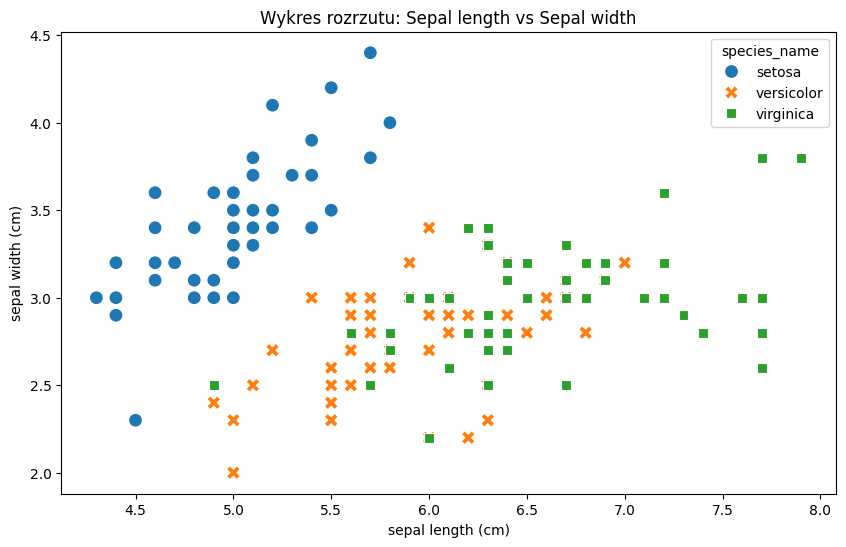

                                sepal length (cm)  sepal width (cm)  \
min                                      4.300000          2.000000   
max                                      7.900000          4.400000   
wariancja (śr. odchylenie kw.)           0.685694          0.189979   

                                petal length (cm)  petal width (cm)  
min                                      1.000000          0.100000  
max                                      6.900000          2.500000  
wariancja (śr. odchylenie kw.)           3.116278          0.581006  

Macierz korelacji:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal widt

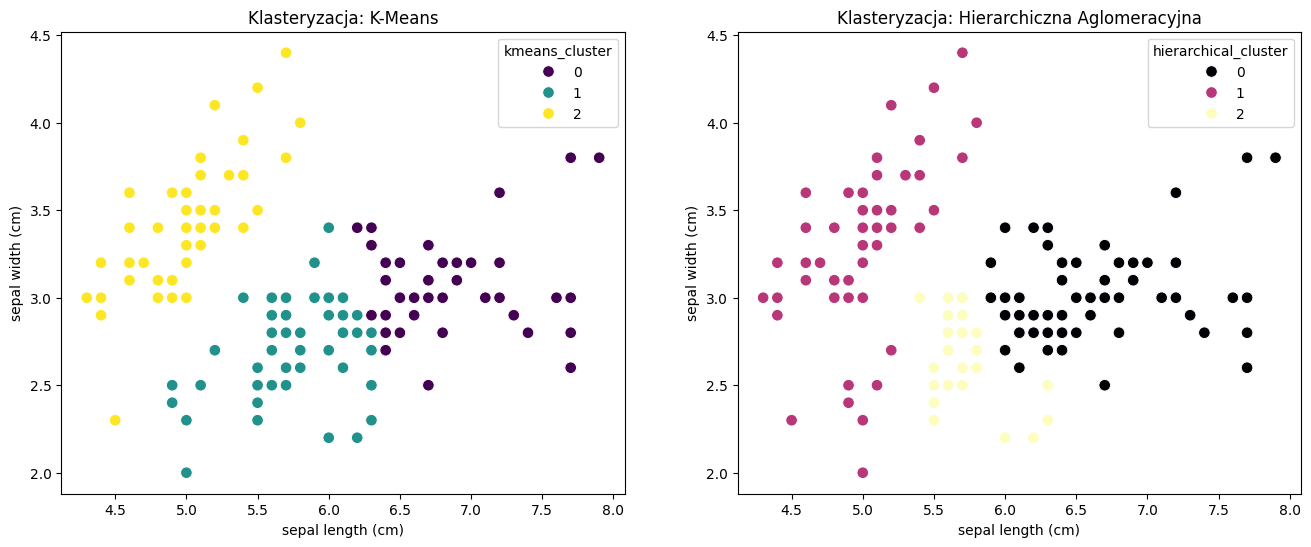

In [41]:
print("Zadanie 3")

df2 = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df2['species'] = iris.target
target_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df2['species_name'] = df2['species'].map(target_names)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='sepal length (cm)', y='sepal width (cm)', hue='species_name', style='species_name', s=100)
plt.title("Wykres rozrzutu: Sepal length vs Sepal width")
plt.show()

atrybuty = df2.iloc[:, :4]
statystyki = atrybuty.agg(['min', 'max', 'var'])
statystyki = statystyki.rename(index={'var': 'wariancja (śr. odchylenie kw.)'})
print(statystyki)

correlation = df2.iloc[:, :4].corr()
print("\nMacierz korelacji:")
print(correlation)
print("-" * 30)

X = df2[['sepal length (cm)', 'sepal width (cm)']]
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df2['kmeans_cluster'] = kmeans.fit_predict(X)

agg_clustering = AgglomerativeClustering(n_clusters=3)
df2['hierarchical_cluster'] = agg_clustering.fit_predict(X)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(data=df2, x='sepal length (cm)', y='sepal width (cm)',
                hue='kmeans_cluster', palette='viridis', ax=ax1, s=70)
ax1.set_title("Klasteryzacja: K-Means")

sns.scatterplot(data=df2, x='sepal length (cm)', y='sepal width (cm)',
                hue='hierarchical_cluster', palette='magma', ax=ax2, s=70)
ax2.set_title("Klasteryzacja: Hierarchiczna Aglomeracyjna")

plt.show()


       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      333.000000     333.000000         333.000000   333.000000   
mean        43.992793      17.164865         200.966967  4207.057057   
std          5.468668       1.969235          14.015765   805.215802   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.500000      15.600000         190.000000  3550.000000   
50%         44.500000      17.300000         197.000000  4050.000000   
75%         48.600000      18.700000         213.000000  4775.000000   
max         59.600000      21.500000         231.000000  6300.000000   

       hierarchical_cluster  hierarchical_cluster_ward  \
count            333.000000                 333.000000   
mean               0.843844                   0.843844   
std                0.752265                   0.752265   
min                0.000000                   0.000000   
25%                0.000000                   0.000000   
50%

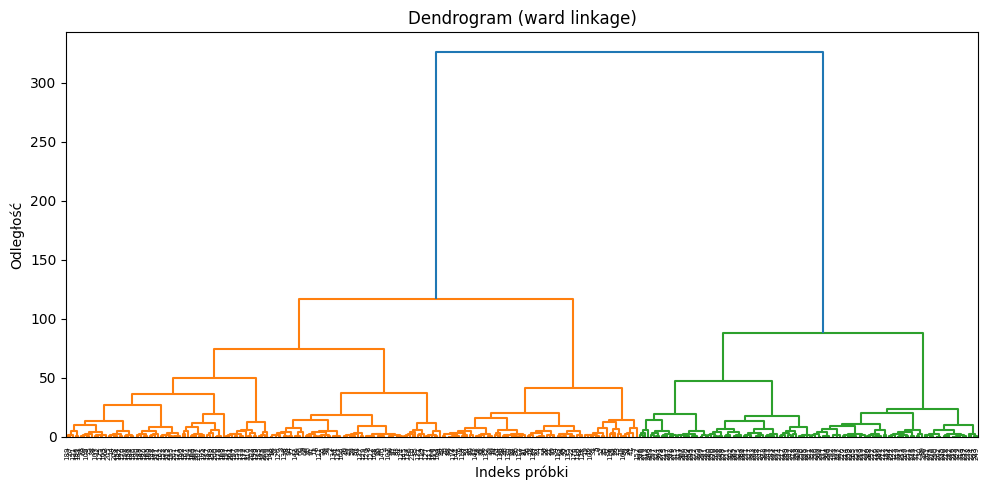

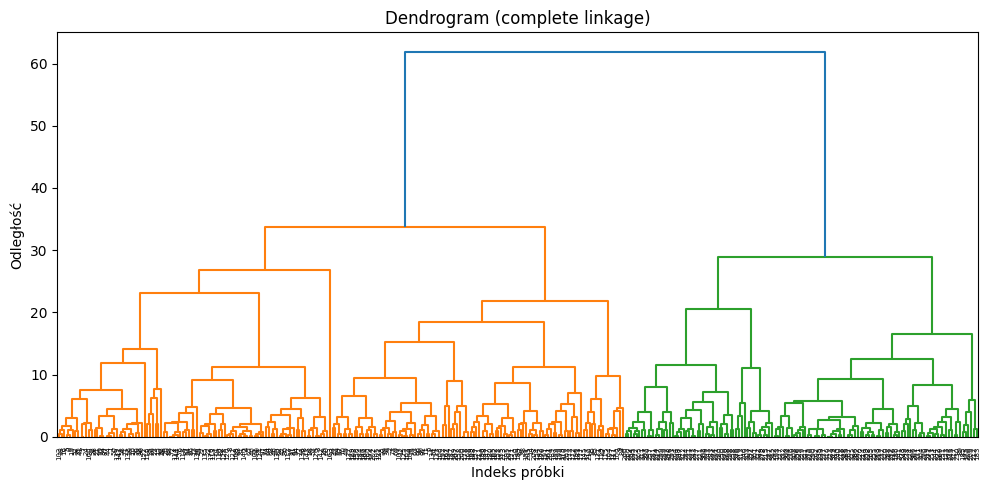

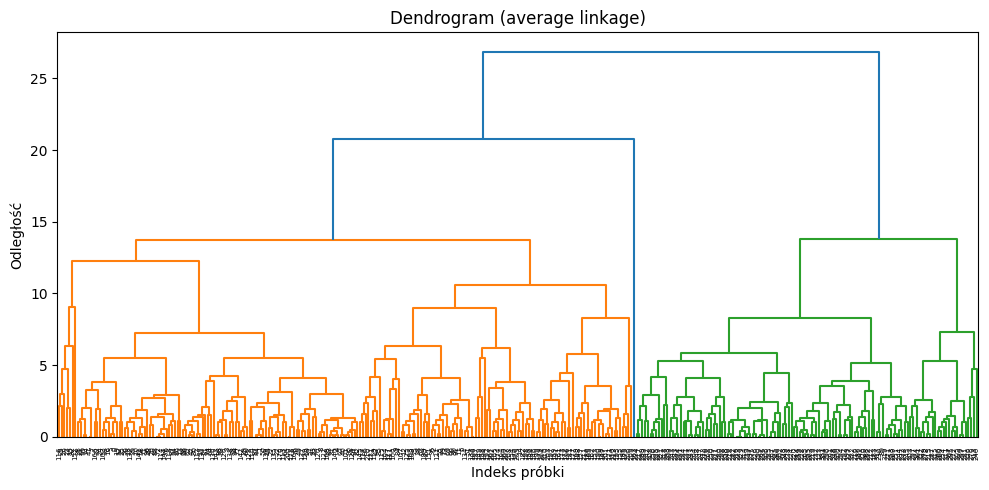

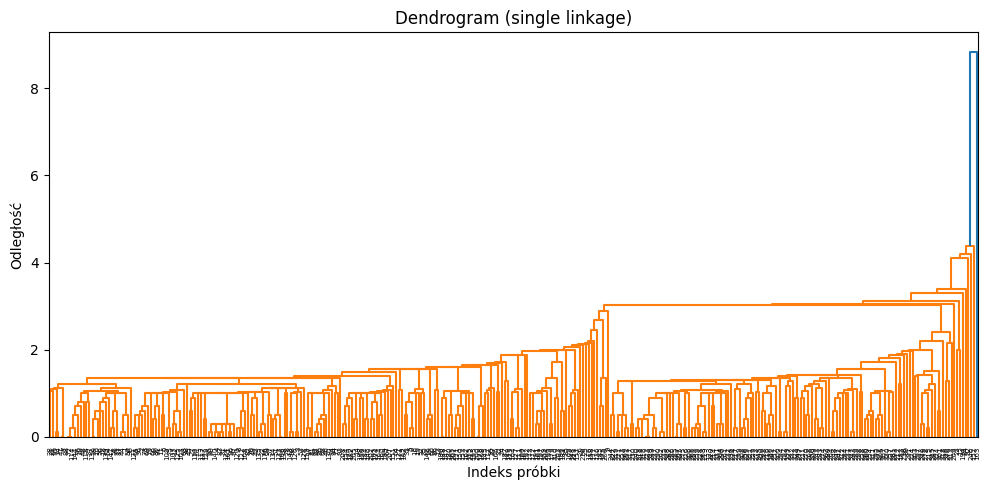

Na podstawie wykresów ward i complete, optymalna liczba klastrów to 3.
------------------------------
Klasteryzacja aglomeracyjna i wykresy rozrzutu:


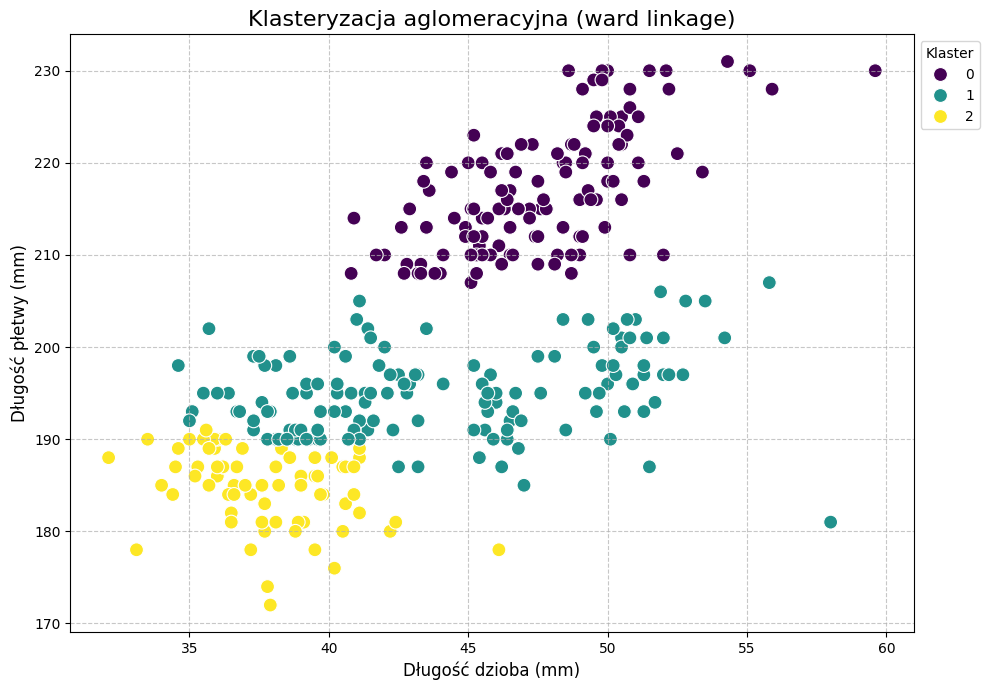

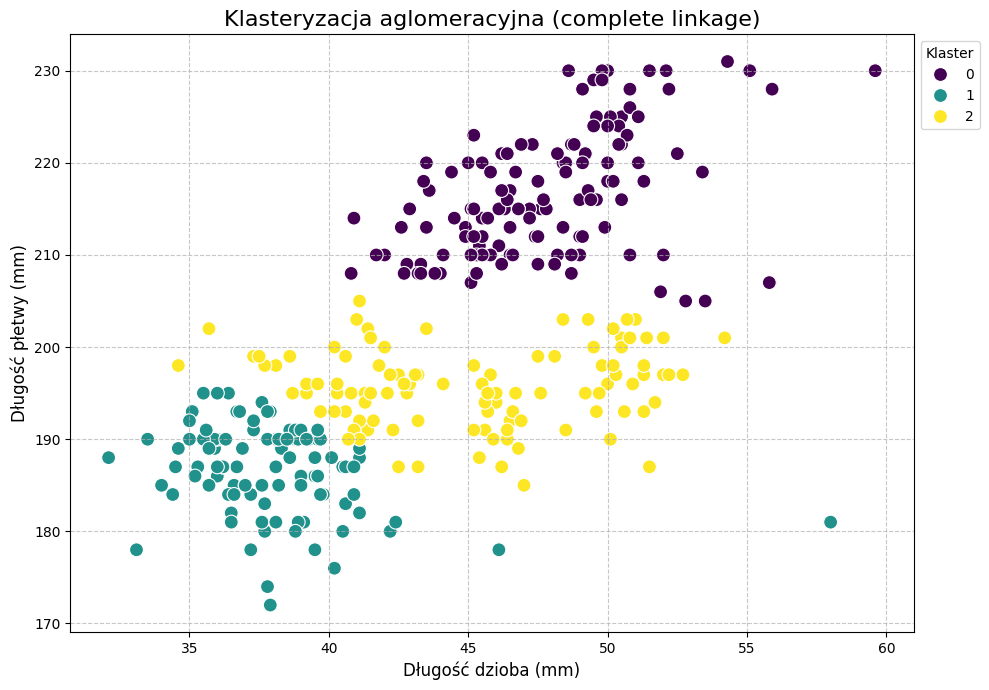

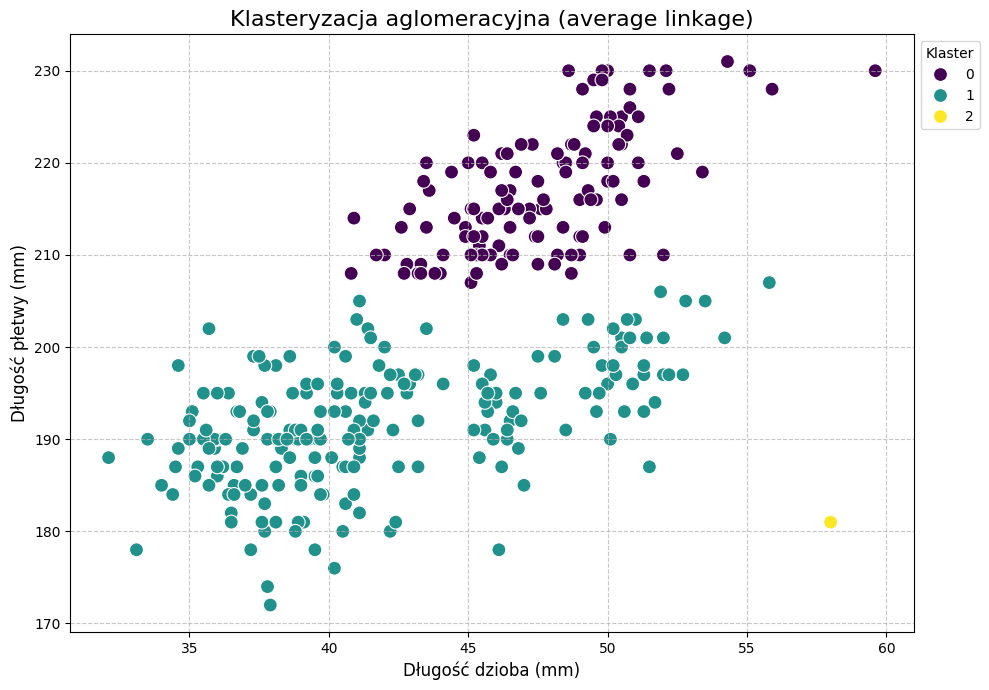

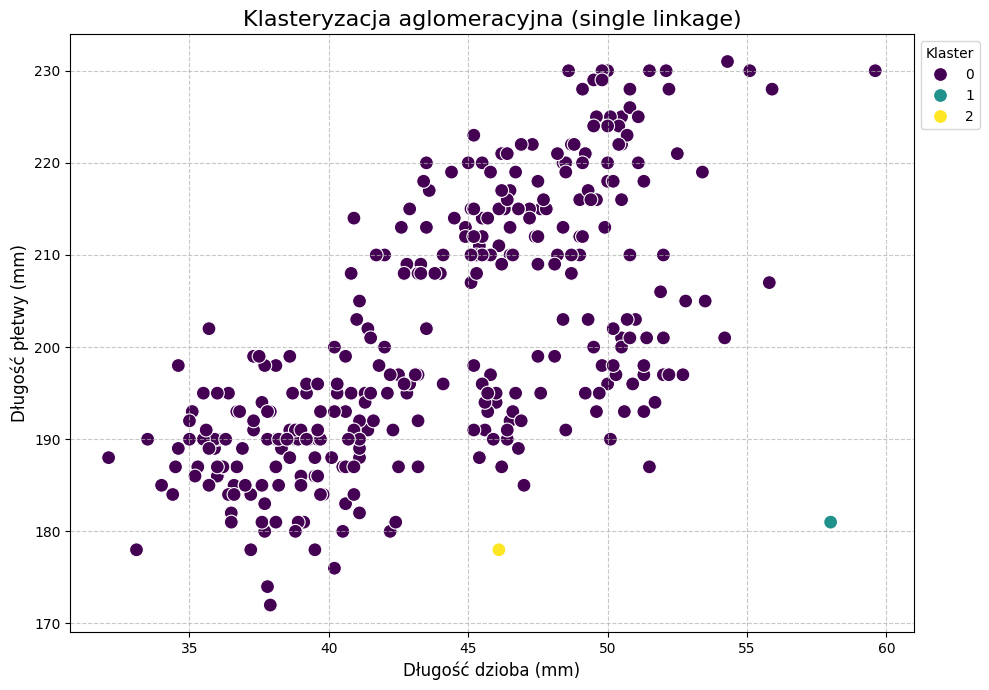

In [67]:
print(df3.describe())
print("Sprawdzenie i usuwanie brakujących wartości:")
df3 = df3.dropna(how='any')
print(df3.isna().sum())
X_penguins = df3[['bill_length_mm', 'flipper_length_mm']]
linkage_methods = ['ward', 'complete', 'average', 'single']

print("-"*30)
print("Dendrogramy:")
for method in linkage_methods:
    plt.figure(figsize=(10, 5))
    linked = linkage(X_penguins, method=method)
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title(f'Dendrogram ({method} linkage)')
    plt.xlabel('Indeks próbki')
    plt.ylabel('Odległość')
    plt.tight_layout()
    plt.show()

print("Na podstawie wykresów (szczególniue ward i complete), optymalna liczba klastrów to 3.")

clusters = 3 # Określona liczba klastrów na podstawie dendrogramu

print("-"*30)
print("Klasteryzacja aglomeracyjna i wykresy rozrzutu:")
for method in linkage_methods:
    agg_clustering = AgglomerativeClustering(n_clusters=clusters, linkage=method)
    df3[f'hierarchical_cluster_{method}'] = agg_clustering.fit_predict(X_penguins)

    plt.figure(figsize=(10, 7))
    sns.scatterplot(
        x='bill_length_mm',
        y='flipper_length_mm',
        hue=f'hierarchical_cluster_{method}',
        palette='viridis',
        data=df3,
        s=100,
        legend='full'
    )
    plt.title(f'Klasteryzacja aglomeracyjna ({method} linkage)', fontsize=16)
    plt.xlabel('Długość dzioba (mm)', fontsize=12)
    plt.ylabel('Długość płetwy (mm)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(title='Klaster', loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()
